## Домашнее задание
Для выполнения задач Easy и Normal опять используем данные Титаника

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv(r'E:\Курсы Питон\train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Easy
Вычислить вероятность выживания, если пассажиру:

от 0 до 25 лет

от 25 до 50 лет

от 50 лет и старше

In [138]:
df_age = df[["Age", "Survived"]].dropna(axis=0, how='any')

In [142]:
a = len(df_age[df_age["Age"] < 25])
b = len(df_age[(df_age["Age"] < 25) & (df_age["Survived"] == 1)])
b/a*100

42.44604316546763

In [143]:
a = len(df_age[(df_age["Age"] >= 25) & (df_age["Age"] < 50)])
b = len(df_age[(df_age["Age"] >= 25) & (df_age["Age"] < 50) & (df_age["Survived"] == 1)])
b/a*100

40.055248618784525

In [145]:
a = len(df_age[df_age["Age"] >= 50])
b = len(df_age[(df_age["Age"] >= 50) & (df_age["Survived"] == 1)])
b/a*100

36.486486486486484

#### Normal
Вычислить с какой вероятностью пассажир женского пола, если известно, что он выжил (использовать теорему Байеса)

In [146]:
df_sex = df[["Sex", "Survived"]].dropna(axis=0, how='any')

f = len(df_sex[df_sex["Sex"] == "female"])
N = len(df_sex)
A1 = f / N
A1 # Вероятность, что пассажир женщина

0.35241301907968575

In [147]:
fs = len(df_sex[(df_sex["Sex"] == "female") & (df_sex["Survived"] == 1)])
B_A1 = fs / N
B_A1 # Вероятность, что пассажир был женщиной и выжил

0.2615039281705948

In [148]:
ms = len(df_sex[(df_sex["Sex"] == "male") & (df_sex["Survived"] == 1)])
B_A2 = ms / N
B_A2 # Вероятность, что пассажир был мужчиной и выжил

0.122334455667789

In [149]:
B = (B_A1 * A1) + (B_A2 * (1 - A1))
B  # полная вероятность, что пассажир выжил

0.17137958963623012

In [150]:
A1_B = (B_A1 * A1) / B
A1_B #  вероятность, что пассажир женского пола, если известно, что он выжил

0.5377384146117379

#### Normal+
Необходимо реализовать градиентный спуск с уменьшением  для функции двух переменных.

Проверить на функции f(x, y) = (x - 3)**4 + (y + 5)**2

Начать из точки (5, 2).

Проверить свое решение на готовых функциях минимизации.


In [29]:
# f(x, y) = (x - 3)**4 + (y + 5)**2
# производная по х: 2y + 10
# производная по y: 4(x - 3)**3
# в точке (5, 2):
# производная по х: 2*2 + 10 = 14
# производная по y: 4(5 - 3)**3 = 32
# обе производные положительны, значит функция возрастает и по оси х, и по оси у. Надо двигаться влево на шаг (step).

In [30]:
# функция
def f(x, y):
    return (x - 3)**4 + (y + 5)**2
 
# производная по первой переменной
def partial_x(x):
    return 4 *  (x - 3)**3
 
# производная по второй переменной
def partial_y(y):
  return 2 * y + 10

# начальная точка
x, y = 5, 2
 
# количество итераций
iter = 100
 
# шаг
step = 0.05

In [31]:
# списки для учета обновления значений x, y и f(x, y)
x_list, y_list, func_list = [], [], []

In [32]:
# цикл с заданным количеством итераций
for i in range(iter):
 
  # в соответствующие списки добавляем значения x, y и f(x, y)
  x_list.append(x)
  y_list.append(y)
  func_list.append(f(x, y))
 
  # расчет частных производных при текущих значениях x и y
  par_x = partial_x(x)
  par_y = partial_y(y)
 
  # обновляем значения x и y в направлении, обратном направлению градиента, умноженному на шаг
  x = x - step * par_x
  y = y - step * par_y
 
# итоговые значения x и y на минимуме функции, и сам минимум
x, y, f(x, y)

(3.1467118093355775, -4.999814070207787, 0.00046333242798989537)

## Визуализация происходящего

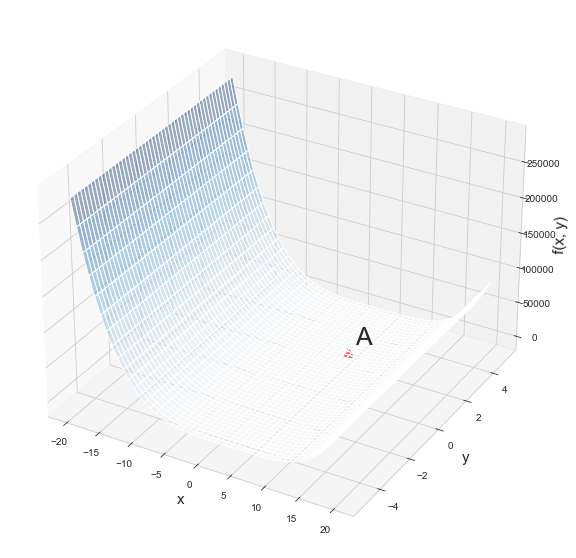

In [37]:
# установка размера графика
fig = plt.figure(figsize = (12,10))
 
# создание последовательности из точек в интервале от -60 до 60 по х и от -5 до 5 по y
x = np.linspace(-20, 20, 6000)
y = np.linspace(-5, 5, 1000)
 
# создание координатной плоскости из осей x и y
x, y = np.meshgrid(x, y)

# создание трехмерного пространства
ax = fig.add_subplot(projection = '3d')

# функция
f = (x - 3)**4 + (y + 5)**2
 
# график функции (alpha задает прозрачность)
ax.plot_surface(x, y, f, alpha = 0.4, cmap = 'Blues')
 
# начальная точка  A с координатами (5, 2, 65) и подпись к ней
ax.scatter(5, 2, 65, c = 'red', marker = '^', s = 100)
ax.text(5, 2.5, 68, 'A', size = 25)
  
# подписи к осям
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('f(x, y)', fontsize = 15)
 
# результат
plt.show()

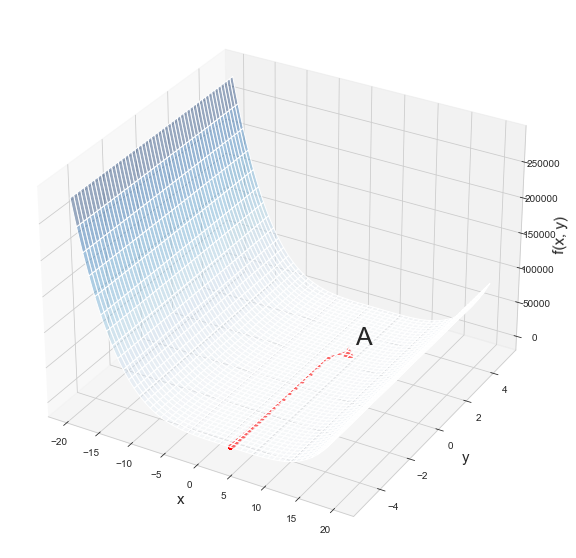

In [36]:
fig = plt.figure(figsize = (12,10))
 
x = np.linspace(-20, 20, 6000)
y = np.linspace(-5, 5, 1000)
 
x, y = np.meshgrid(x, y)
 
f = (x - 3)**4 + (y + 5)**2
 
ax = fig.add_subplot(projection = '3d')
 
ax.plot_surface(x, y, f, alpha = 0.4, cmap = 'Blues')

ax.scatter(5, 2, 65, c = 'red', marker = '^', s = 100)
ax.text(5, 2.5, 68, 'A', size = 25)
 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('f(x, y)', fontsize = 15)
 
# выведем путь алгоритма оптимизации
ax.plot(x_list, y_list, func_list, '.-', c = 'red')
 
plt.show()